In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("max_rows", 20)
pd.set_option("max_colwidth", 100)


In [2]:
# data from https://www.ksh.hu/stadat_files/ara/hu/ara0043.html

# data_url = "https://www.ksh.hu/stadat_files/ara/hu/ara0043.xlsx"

data_file = "data/stadat-ara0043-1.2.1.5-hu.xlsx"

data = pd.read_excel(data_file, index_col=0, header=1, nrows=146)

data.replace('..', np.nan, inplace=True)

code_col = "Kódszám"
month_col = "2021. december"
price_change_label = "Árváltozás"
histogram_label = "Eloszlás"
description_col = "Megnevezés"

In [3]:
data.head()

,Megnevezés,2017. Súly,2017. január,2017. február,2017. március,2017. április,2017. május,2017. június,2017. július,2017. augusztus,...,2021. március,2021. április,2021. május,2021. június,2021. július,2021. augusztus,2021. szeptember,2021. október,2021. november,2021. december
Kódszám,,,,,,,,,,,,,,,,,,,,,
"Az előző év azonos időszaka = 100,0%",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Élelmiszerek és alkoholmentes italok,21.495,101.1,101.7,102.0,101.7,102.5,103.1,103.3,103.1,...,102.1,101.7,101.8,102.4,102.4,103.0,103.8,104.7,105.5,107.8
01.1,Élelmiszerek,18.491,101.1,101.6,102.0,101.6,102.7,103.2,103.5,103.1,...,101.9,101.6,101.6,102.5,102.6,103.3,104.1,104.9,105.9,108.4
01.1.1,Kenyér és cereáliák,3.247,101.2,101.5,102.5,101.9,102.5,102.6,103.1,102.8,...,104.3,104.9,104.9,105.1,104.1,104.5,104.6,106.9,109.9,111.7
01.1.2,Hús,4.680,99.0,99.8,100.5,101.2,102.3,103.3,103.0,101.9,...,98.2,98.1,98.5,100.2,101.4,101.4,101.9,101.5,101.9,103.4


In [4]:
data.tail()

,Megnevezés,2017. Súly,2017. január,2017. február,2017. március,2017. április,2017. május,2017. június,2017. július,2017. augusztus,...,2021. március,2021. április,2021. május,2021. június,2021. július,2021. augusztus,2021. szeptember,2021. október,2021. november,2021. december
Kódszám,,,,,,,,,,,,,,,,,,,,,
12.5.4,Jármű- és közlekedés-biztosítás,0.271,100.6,98.7,98.2,99.2,98.7,102.7,107.2,108.0,...,104.5,103.4,103.0,99.9,103.4,99.1,98.9,97.9,98.1,99.0
12.6,Máshova nem sorolt pénzügyi szolgáltatások,1.845,102.0,102.0,102.0,102.0,102.0,102.6,102.6,102.6,...,101.5,103.1,103.5,103.5,103.5,103.5,103.5,103.5,104.9,104.9
12.6.2.,Egyéb máshova nem sorolt pénzügyi szolgáltatás,1.845,102.0,102.0,102.0,102.0,102.0,102.6,102.6,102.6,...,101.5,103.1,103.5,103.5,103.5,103.5,103.5,103.5,104.9,104.9
12.7,Máshova nem sorolt egyéb szolgáltatások,0.325,101.5,101.7,101.6,101.5,101.4,101.5,101.9,101.7,...,103.9,104.0,104.0,104.3,104.6,104.7,105.2,105.3,105.6,105.6
NaN,Mindösszesen,100.000,102.3,102.9,102.7,102.2,102.1,101.9,102.1,102.6,...,103.7,105.1,105.1,105.3,104.6,104.9,105.5,106.5,107.4,107.4


In [5]:
category_rows = ["." in str(x) for x in data.index]


In [6]:
data[category_rows].head()

,Megnevezés,2017. Súly,2017. január,2017. február,2017. március,2017. április,2017. május,2017. június,2017. július,2017. augusztus,...,2021. március,2021. április,2021. május,2021. június,2021. július,2021. augusztus,2021. szeptember,2021. október,2021. november,2021. december
Kódszám,,,,,,,,,,,,,,,,,,,,,
01.1,Élelmiszerek,18.491,101.1,101.6,102.0,101.6,102.7,103.2,103.5,103.1,...,101.9,101.6,101.6,102.5,102.6,103.3,104.1,104.9,105.9,108.4
01.1.1,Kenyér és cereáliák,3.247,101.2,101.5,102.5,101.9,102.5,102.6,103.1,102.8,...,104.3,104.9,104.9,105.1,104.1,104.5,104.6,106.9,109.9,111.7
01.1.2,Hús,4.680,99.0,99.8,100.5,101.2,102.3,103.3,103.0,101.9,...,98.2,98.1,98.5,100.2,101.4,101.4,101.9,101.5,101.9,103.4
01.1.3,Hal és tengeri állat,0.224,102.9,103.0,105.2,104.0,105.1,104.9,106.4,105.5,...,104.1,103.1,102.2,102.7,104.0,105.6,106.1,106.5,107.2,107.8
01.1.4,"Tej, sajt és tojás",4.070,101.1,101.3,102.5,101.8,103.4,104.0,105.2,106.4,...,100.6,101.2,102.0,102.4,102.0,101.8,102.5,103.8,104.9,111.3


Text(0.5, 1.0, 'Eloszlás')

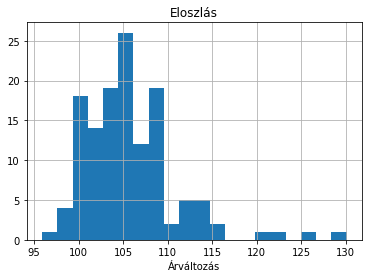

In [7]:
plt = data[category_rows][month_col].hist(bins=20)
plt.set_xlabel(price_change_label)
plt.set_title(histogram_label)

In [8]:
data[category_rows].sort_values(month_col, ascending=False)[[description_col, month_col]].head(n=20)

,Megnevezés,2021. december
Kódszám,,
07.2.4,Személyszállító járművekkel kapcsolatos egyéb szolgáltatások,130.1
07.2.2,Üzemanyagok és kenőanyagok,125.9
07.2,Személyszállító járművek üzemeltetése,123.1
01.1.5,Olaj és zsiradék,120.3
04.3.1,Lakáskarbantartáshoz és- javításhoz vásárolt anyagok,116.1
04.3,Lakáskarbantartás és -javítás,115.2
05.1.1,Bútorok és lakberendezési cikkek,114.5
09.3.3,"Kertészkedési cikkek, növények, virágok",114.4
04.3.2,Lakáskarbantartási és -javítási szolgáltatások,114.4


In [9]:
data[category_rows].sort_values(month_col, ascending=False)[[description_col, month_col]].tail(n=20)

,Megnevezés,2021. december
Kódszám,,
07.3.2,Közúti személyszállítás,100.5
10.4,Felsőfokú oktatás,100.4
06.3,Fekvőbeteg-ellátás,100.4
09.3.2,"Sporteszközök, kempingcikkek",100.3
12.5.3,Egészségbiztosítás,100.0
04.5.5,Melegvíz- és hőszolgáltatás,100.0
09.4.3,Szerencsejáték,100.0
07.3.1,Kötöttpályás személyszállítás,100.0
04.4.1,Vízellátás,100.0
